#**TRANSFORMERS**
The Transformers implementation is divided into 3 parts. The reason for this is that the storage capacity of Google Colab does not allow (without payment options) to run the code for all pre-trained models.
Therefore, pr-trained models are divided to be executed separately:
- **Part 1**: BERT / BERT LARGE / DEBERTA / DISTILBERT
- **Part 2**: ALBERT XXLARGE
- **Part 3**: ROBERTA 

### IMPORT PACKAGES

In [1]:
!pip install transformers
!pip install simpletransformers
import transformers
from transformers import TFAutoModel
import pandas as pd
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Dropout, Dense, Bidirectional, LSTM, GRU
from keras import Model, optimizers, callbacks
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pydotplus
import keras
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 60.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


##IMPORT DATA FROM LOCAL FILES
Files to upload:
- test_category.csv
- test_data.csv
- train_category.csv
- train_data.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_category.csv to test_category.csv
Saving test_data.csv to test_data.csv
Saving train_category.csv to train_category.csv
Saving train_data.csv to train_data.csv


## DOWNLOAD PRETRAINED MODELS FROM HUGGINGFACE
For each model:

* Tokenizer
* Pretrained model



In [ ]:
pre_models_1 = {
    "BERT":( transformers.BertTokenizer.from_pretrained('bert-base-uncased'), 
            TFAutoModel.from_pretrained('bert-base-uncased', from_pt=True)
            ),
    "BERT LARGE": ( transformers.BertTokenizer.from_pretrained('bert-large-cased'),
                   TFAutoModel.from_pretrained('bert-large-cased', from_pt=True)
                   ),
    "ROBERTA": ( transformers.RobertaTokenizer.from_pretrained('roberta-large'),
                TFAutoModel.from_pretrained('roberta-large', from_pt=True)
                ),
    "DISTILBERT": ( transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased'),
                   TFAutoModel.from_pretrained('distilbert-base-uncased', from_pt=True)
                   ),
    "ALBERT": ( transformers.AlbertTokenizer.from_pretrained('albert-base-v2'),
               TFAutoModel.from_pretrained('albert-base-v2', from_pt=True)
               ),
    "ALBERT XXLARGE":( transformers.AlbertTokenizer.from_pretrained('albert-xxlarge-v2'), 
                        TFAutoModel.from_pretrained('albert-xxlarge-v2', from_pt=True)
                        ),
    "DEBERTA": ( transformers.DebertaTokenizer.from_pretrained('microsoft/deberta-base'),
                TFAutoModel.from_pretrained('microsoft/deberta-base', from_pt=True)
                )

}

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Downloading:   0%|          | 0.00/760k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/684 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertModel: ['predictions.LayerNorm.weight', 'predictions.bias', 'predictions.dense.weight', 'predictions.LayerNorm.bias', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing TFAlbertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFAlbertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/474 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/559M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDebertaModel: ['lm_predictions.lm_head.dense.weight', 'deberta.embeddings.position_embeddings.weight', 'lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.dense.bias']
- This IS expected if you are initializing TFDebertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDebertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDebertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDebertaModel for predictions wi

In [ ]:
pre_models_2 = {
    "ALBERT XXLARGE":( transformers.AlbertTokenizer.from_pretrained('albert-xxlarge-v2'), 
                        TFAutoModel.from_pretrained('albert-xxlarge-v2', from_pt=True)
                        ),
}

In [ ]:
pre_models_3 = {
    "ROBERTA": ( transformers.RobertaTokenizer.from_pretrained('roberta-large'),
                TFAutoModel.from_pretrained('roberta-large', from_pt=True)
                )

}

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


TEXT PREPROCESSING

There are two text preprocessing methods:
 
1.    **Simple text preprocessing**: simple form of pre-processing including filtering with regex, stopword removal and dimensionality reduction with lemmatisation
2.   **Complex text preprocessing**: Stricter text pre-processing. Include transformation of contractions and grammatical derivations into their full form. The changes come from observations made with Knowledge Graphs for Increment 4.



In [ ]:
# SIMPLE TEXT PREPROCESSING
def preprocessing(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-z_+\-*]', ' ', text).strip()
    lemm = WordNetLemmatizer()
    title = []
    for token in text.split():
        title.append(token)
    return ' '.join(str(elem) for elem in title)

In [ ]:
# COMPLEX TEXT PREPROCESSING
contr = {
    "aren't": "are not",
    "she'd": "she had",
    "can't": "cannot",
    "shouldn't": "should not",
    "couldn't": "could not",
    "that's": "that is",
    "didn't": "did not",
    "there's": "there is",
    "don't": "do not",
    "they're": "they are",
    "doesn't": "does not",
    "they've": "they have",
    "hadn't": "had not",
    "they'll": "they will",
    "haven't": "have not",
    "they'd": "they would",
    "he's": "he is",
    "they'd": "they had",
    "he's": "he has",
    "wasn't": "was not",
    "he'll": "he will",
    "we're": "we are",
    "he'd": "he would",
    "we've": "we have",
    "here's": "here is",
    "we'll": "we will",
    "i'm": "I am",
    "we'd": "we would",
    "i've": "I have",
    "we'd": "we had",
    "i'll": "I will",
    "weren't": "were not",
    "i'd": "I would",
    "what's": "what is",
    "i'd": "I had",
    "where's": "where is",
    "isn't": "is not",
    "who's": "who is",
    "it's": "it is",
    "who'll": "who will",
    "it's": "it has",
    "won't": "will not",
    "it's": "it has",
    "wouldn't": "would not",
    "it'll": "it will",
    "you're": "you are",
    "mustn't": "must not",
    "you've": "you have",
    "she's": "she is",
    "you'll": "you will",
    "she's": "she has",
    "you'd": "you would",
    "she'll": "she will",
    "you'd": "you had",
    "she'd": "she would"
}
capitonyms = {
    "US": "the United States of America",
    "Turkey": "turkish country",
    "Fiat": "the italian automobile manufacturer",
    "Conservative": "member of the conservative party",
    "Cat": "Catherine",
    "AM": "ante Meridiem"
}
abbreviations = {
    "dr.": "doctor",
    "assoc.": "association",
    "sr.": "senior",
    "st.": "saint"
}
def expand_dict(s, dict):
    exp = re.compile('(%s)' % '|'.join(dict.keys()))
    def replace(matcher):
        return dict[matcher.group(0)]
    return exp.sub(replace, s)
def preprocessing(text):
    text_c = expand_dict(text, capitonyms)
    text = text_c.lower()
    text_co = expand_dict(text, contr)
    text_cleaned = re.sub(r'[^0-9a-z_+\-*]', ' ', text_co).strip()
    lemm = WordNetLemmatizer()
    title = []
    for token in text_cleaned.split():
        token_lemm = lemm.lemmatize(token)
        if token_lemm not in stopwords.words('english'):
             title.append(lemm.lemmatize(token))
    return ' '.join(str(elem) for elem in title)


In [ ]:
def encode(text, tokenizer, max_len):
    code = tokenizer.batch_encode_plus(batch_text_or_text_pairs=text,
                                       max_length=max_len,
                                       return_tensors='pt',
                                       #return_attention_mask=True,
                                       return_token_type_ids=False,
                                       truncation=True,
                                       padding='max_length')
                                       #pad_to_max_length=True)
    return np.array(code['input_ids'])

## MODEL EVALUATION METRICS

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
def my_confusion_matrix(test_label, label_pred, model_name):
    labels = ['b', 'e', 'm', 't']
    conf = confusion_matrix(test_label, label_pred)
    cmd_obj = ConfusionMatrixDisplay(conf, display_labels=labels)
    cmd_obj.plot()
    cmd_obj.ax_.set(xlabel='Predicciones', ylabel='Valores reales')
    plt.title(f'Confussion matrix: {model_name}')
    plt.show()


def my_evaluation(test_label, label_pred, model_name):
    print(f"************* METRICS AVERAGE: {model_name} *************")
    print("Accuracy: ", accuracy_score(label_pred, test_label) * 100)
    print("Precision: ", precision_score(label_pred, test_label, average='macro') * 100)
    print("Recall: ", recall_score(label_pred, test_label, average='macro') * 100)
    print("f1: ", f1_score(label_pred, test_label, average='macro') * 100)
    print()
    print(f"************* METRICS BY CATEGORY {model_name} *************")
    print("Precision by cat.: ", precision_score(label_pred, test_label, average=None) * 100)
    print("Recall by cat.: ", recall_score(label_pred, test_label, average=None) * 100)
    print("f1 by cat.: ", f1_score(label_pred, test_label, average=None) * 100)
    print()

In [ ]:
train_data_df = pd.read_csv('/content/train_data.csv')
test_data_df = pd.read_csv('/content/test_data.csv')
train_label_df = pd.read_csv('/content/train_category.csv')
test_label_df = pd.read_csv('/content/test_category.csv')
train_data = train_data_df['headline']
test_data = test_data_df['headline']
train_label = train_label_df['labels']
test_label = test_label_df['labels']

## DATA PREPARATION

In [ ]:
train_data = train_data.apply(lambda x: preprocessing(str(x)).lower()) 
test_data = test_data.apply(lambda x: preprocessing(str(x)).lower())

In [ ]:
max_len = 20

In [ ]:
label_encoder = LabelEncoder()
num_label = train_label.nunique()
train_label_transformed = label_encoder.fit_transform(train_label)
test_label_transformed = label_encoder.fit_transform(test_label)
train_label_encoded = to_categorical(train_label_transformed, num_classes=num_label, dtype='int32')
test_label_encoded = to_categorical(test_label_transformed, num_classes=num_label, dtype='int32')

In [ ]:
def build_model(transformer, loss='categorical_crossentropy', max_len=max_len):
    input_word_ids = Input(shape=(max_len,), dtype='int32', name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    drop = Dropout(0.5, name='Dropout_1')(sequence_output)
    lstm = GRU(450, name='LSTM')(drop)
    layer = Dropout(0.5, name='Dropout_2')(lstm)
    out = Dense(num_label, activation='sigmoid', name='Dense')(layer)

    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=2e-5), loss=loss, metrics=['accuracy'])
    return model

In [ ]:
BATCH_SIZE = 32
num_epochs = 4

In [ ]:
def create_datasets(train_data_encoded, train_label_encoded, test_data_encoded):
  AUTO = tf.data.experimental.AUTOTUNE
  train_dataset = (
      tf.data.Dataset
      .from_tensor_slices((train_data_encoded, tf.convert_to_tensor(train_label_encoded)))
      .repeat()
      .shuffle(2048)
      .batch(BATCH_SIZE)
      .prefetch(AUTO)
  )
  test_dataset = (
      tf.data.Dataset
      .from_tensor_slices(test_data_encoded)
      .batch(BATCH_SIZE)
  )
  n_steps = train_data.shape[0] // BATCH_SIZE
  return train_dataset, test_dataset, n_steps

## EXECUTION OF MODELS
The execution is repeated 3 times in order to execute the 3 dictionaries of pre-trained models

KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.int32, name='input_word_ids'), name='input_word_ids', description="created by layer 'input_word_ids'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 768), dtype=tf.float32, name=None), name='tf_bert_model/bert/encoder/layer_._11/output/LayerNorm/batchnorm/add_1:0', description="created by layer 'tf_bert_model'")
Epoch 1/4


742/742 [==============================] - 135s 157ms/step - loss: 0.4348 - accuracy: 0.8395
Epoch 2/4
742/742 [==============================] - 118s 159ms/step - loss: 0.2018 - accuracy: 0.9322
Epoch 3/4
742/742 [==============================] - 117s 158ms/step - loss: 0.1315 - accuracy: 0.9555
Epoch 4/4
40/40 [==============================] - 5s 56ms/step
************* METRICS AVERAGE: BERT *************
Accuracy:  92.56
Precision:  92.52671158119037
Recall:  92.56365567456416
f1:  92.53061042951278

************* METRICS BY CATEGORY BERT *************
Precision by cat.:  [87.62541806 96.38554217 95.1048951  90.99099099]
Recall by cat.:  [91.60839161 94.67455621 93.79310345 90.17857143]
f1 by cat.:  [89.57264957 95.52238806 94.44444444 90.58295964]



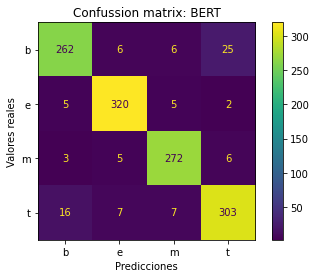

KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.int32, name='input_word_ids'), name='input_word_ids', description="created by layer 'input_word_ids'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 1024), dtype=tf.float32, name=None), name='tf_bert_model_1/bert/encoder/layer_._23/output/LayerNorm/batchnorm/add_1:0', description="created by layer 'tf_bert_model_1'")
Epoch 1/4


742/742 [==============================] - 367s 451ms/step - loss: 0.5062 - accuracy: 0.8192
Epoch 2/4
742/742 [==============================] - 335s 451ms/step - loss: 0.2464 - accuracy: 0.9185
Epoch 3/4
742/742 [==============================] - 335s 451ms/step - loss: 0.1425 - accuracy: 0.9538
Epoch 4/4
40/40 [==============================] - 11s 142ms/step
************* METRICS AVERAGE: BERT LARGE *************
Accuracy:  93.2
Precision:  93.19232231751874
Recall:  93.25670089620566
f1:  93.20855609489428

************* METRICS BY CATEGORY BERT LARGE *************
Precision by cat.:  [92.64214047 94.57831325 93.35664336 92.19219219]
Recall by cat.:  [88.78205128 95.73170732 96.04316547 92.46987952]
f1 by cat.:  [90.6710311  95.15151515 94.68085106 92.33082707]



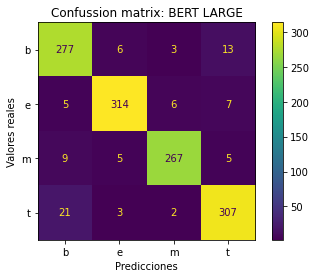

KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.int32, name='input_word_ids'), name='input_word_ids', description="created by layer 'input_word_ids'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 1024), dtype=tf.float32, name=None), name='tf_roberta_model/roberta/encoder/layer_._23/output/LayerNorm/batchnorm/add_1:0', description="created by layer 'tf_roberta_model'")
Epoch 1/4


742/742 [==============================] - 375s 463ms/step - loss: 0.5072 - accuracy: 0.8206
Epoch 2/4
742/742 [==============================] - 343s 462ms/step - loss: 0.2735 - accuracy: 0.9109
Epoch 3/4
742/742 [==============================] - 342s 462ms/step - loss: 0.1975 - accuracy: 0.9344
Epoch 4/4
40/40 [==============================] - 12s 141ms/step
************* METRICS AVERAGE: ROBERTA *************
Accuracy:  93.52000000000001
Precision:  93.48462632904749
Recall:  93.64394466687138
f1:  93.52789474643399

************* METRICS BY CATEGORY ROBERTA *************
Precision by cat.:  [88.9632107  93.97590361 95.8041958  95.1951952 ]
Recall by cat.:  [92.36111111 97.19626168 95.47038328 89.5480226 ]
f1 by cat.:  [90.63032368 95.55895865 95.63699825 92.2852984 ]



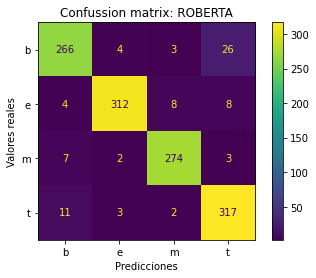

KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.int32, name='input_word_ids'), name='input_word_ids', description="created by layer 'input_word_ids'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 768), dtype=tf.float32, name=None), name='tf_distil_bert_model/distilbert/transformer/layer_._5/output_layer_norm/batchnorm/add_1:0', description="created by layer 'tf_distil_bert_model'")
Epoch 1/4
742/742 [==============================] - 75s 88ms/step - loss: 0.4288 - accuracy: 0.8457
Epoch 2/4
742/742 [==============================] - 65s 88ms/step - loss: 0.2132 - accuracy: 0.9273
Epoch 3/4
742/742 [==============================] - 65s 88ms/step - loss: 0.1327 - accuracy: 0.9558
Epoch 4/4
40/40 [==============================] - 3s 30ms/step
************* METRICS AVERAGE: DISTILBERT *************
Accuracy:  93.28
Precision:  93.39261290544685
Recall:  93.24570240114213
f1:  93.26013794273715

************* METRICS BY CATEGORY DISTILBERT *************
Precision by cat.:

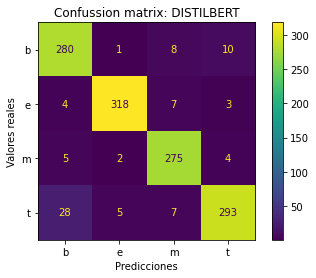

KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.int32, name='input_word_ids'), name='input_word_ids', description="created by layer 'input_word_ids'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 768), dtype=tf.float32, name=None), name='tf_albert_model/albert/encoder/albert_layer_groups_._0/albert_layers_._0/full_layer_layer_norm/batchnorm_11/add_1:0', description="created by layer 'tf_albert_model'")
Epoch 1/4


742/742 [==============================] - 120s 143ms/step - loss: 0.6713 - accuracy: 0.7593
Epoch 2/4
742/742 [==============================] - 106s 142ms/step - loss: 0.3503 - accuracy: 0.8868
Epoch 3/4
742/742 [==============================] - 106s 142ms/step - loss: 0.2531 - accuracy: 0.9175
Epoch 4/4
40/40 [==============================] - 5s 59ms/step
************* METRICS AVERAGE: ALBERT *************
Accuracy:  92.47999999999999
Precision:  92.53911743435054
Recall:  92.51545958632576
f1:  92.44177000126069

************* METRICS BY CATEGORY ALBERT *************
Precision by cat.:  [88.29431438 91.56626506 97.2027972  93.09309309]
Recall by cat.:  [92.63157895 97.43589744 88.81789137 91.17647059]
f1 by cat.:  [90.4109589  94.40993789 92.82136895 92.12481426]



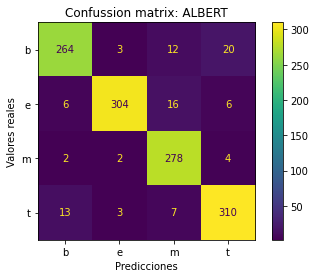

KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.int32, name='input_word_ids'), name='input_word_ids', description="created by layer 'input_word_ids'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 768), dtype=tf.float32, name=None), name='tf_deberta_model/deberta/encoder/layer_._11/output/LayerNorm/batchnorm/add_1:0', description="created by layer 'tf_deberta_model'")
Epoch 1/4


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


742/742 [==============================] - 201s 225ms/step - loss: 0.6720 - accuracy: 0.7663
Epoch 2/4
742/742 [==============================] - 167s 225ms/step - loss: 0.3976 - accuracy: 0.8711
Epoch 3/4
742/742 [==============================] - 167s 225ms/step - loss: 0.2798 - accuracy: 0.9093
Epoch 4/4
40/40 [==============================] - 9s 60ms/step
************* METRICS AVERAGE: DEBERTA *************
Accuracy:  92.0
Precision:  92.03148971024821
Recall:  92.04826875253875
f1:  91.9952329368159

************* METRICS BY CATEGORY DEBERTA *************
Precision by cat.:  [88.9632107  91.26506024 95.1048951  92.79279279]
Recall by cat.:  [89.56228956 97.74193548 91.58249158 89.30635838]
f1 by cat.:  [89.26174497 94.39252336 93.31046312 91.01620029]



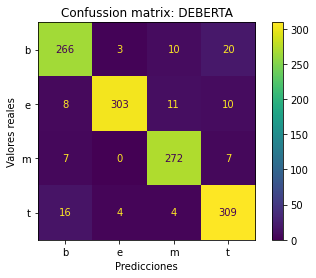

In [ ]:
# PART 1
for pre_model in pre_models_1:
  tokenizer = pre_models_1[pre_model][0]
  transformer = pre_models_1[pre_model][1]
  train_data = train_data.apply(lambda x: preprocessing(str(x)).lower()) 
  test_data = test_data.apply(lambda x: preprocessing(str(x)).lower())
  model = build_model(transformer, max_len=max_len)
  train_data_encoded = encode(train_data.astype('str'), tokenizer, max_len=max_len)
  test_data_encoded = encode(test_data.astype('str'), tokenizer, max_len=max_len)
  train_dataset, test_dataset, n_steps = create_datasets(train_data_encoded, train_label_encoded, test_data_encoded)
  model.fit(train_dataset, steps_per_epoch=n_steps, epochs=num_epochs)
  label_prediction = model.predict(test_data_encoded)
  label_pred_encoded = np.argmax(label_prediction, axis=1)
  my_evaluation(test_label_transformed, label_pred_encoded, pre_model)
  my_confusion_matrix(test_label_transformed, label_pred_encoded, pre_model)

KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.int32, name='input_word_ids'), name='input_word_ids', description="created by layer 'input_word_ids'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 4096), dtype=tf.float32, name=None), name='tf_albert_model_1/albert/encoder/albert_layer_groups_._0/albert_layers_._0/full_layer_layer_norm/batchnorm_11/add_1:0', description="created by layer 'tf_albert_model_1'")
Epoch 1/4


742/742 [==============================] - 1982s 3s/step - loss: 1.2107 - accuracy: 0.4079
Epoch 2/4
742/742 [==============================] - 1964s 3s/step - loss: 0.4932 - accuracy: 0.8331
Epoch 3/4
742/742 [==============================] - 1964s 3s/step - loss: 0.3204 - accuracy: 0.8945
Epoch 4/4
40/40 [==============================] - 36s 823ms/step
************* METRICS AVERAGE: ALBERT XXLARGE *************
Accuracy:  90.72
Precision:  90.82192060845806
Recall:  91.04823454592841
f1:  90.7870479502956

************* METRICS BY CATEGORY ALBERT XXLARGE *************
Precision by cat.:  [92.97658863 91.56626506 91.95804196 86.78678679]
Recall by cat.:  [81.04956268 98.38187702 93.59430605 91.16719243]
f1 by cat.:  [86.60436137 94.85179407 92.76895944 88.92307692]



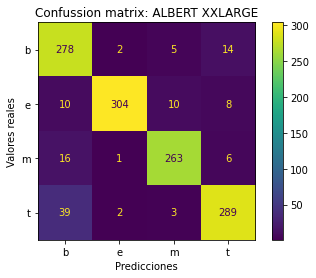

In [ ]:
# PART 2
for pre_model in pre_models_2:
  tokenizer = pre_models_2[pre_model][0]
  transformer = pre_models_2[pre_model][1]
  train_data = train_data.apply(lambda x: preprocessing(str(x)).lower()) 
  test_data = test_data.apply(lambda x: preprocessing(str(x)).lower())
  model = build_model(transformer, max_len=max_len)
  train_data_encoded = encode(train_data.astype('str'), tokenizer, max_len=max_len)
  test_data_encoded = encode(test_data.astype('str'), tokenizer, max_len=max_len)
  train_dataset, test_dataset, n_steps = create_datasets(train_data_encoded, train_label_encoded, test_data_encoded)
  model.fit(train_dataset, steps_per_epoch=n_steps, epochs=num_epochs)
  label_prediction = model.predict(test_data_encoded)
  label_pred_encoded = np.argmax(label_prediction, axis=1)
  my_evaluation(test_label_transformed, label_pred_encoded, pre_model)
  my_confusion_matrix(test_label_transformed, label_pred_encoded, pre_model)

KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.int32, name='input_word_ids'), name='input_word_ids', description="created by layer 'input_word_ids'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 1024), dtype=tf.float32, name=None), name='tf_roberta_model/roberta/encoder/layer_._23/output/LayerNorm/batchnorm/add_1:0', description="created by layer 'tf_roberta_model'")
Epoch 1/4


742/742 [==============================] - 367s 454ms/step - loss: 1.3253 - accuracy: 0.3899
Epoch 2/4
742/742 [==============================] - 344s 464ms/step - loss: 0.3903 - accuracy: 0.8703
Epoch 3/4
742/742 [==============================] - 345s 465ms/step - loss: 0.2546 - accuracy: 0.9153
Epoch 4/4
40/40 [==============================] - 11s 144ms/step
************* METRICS AVERAGE: ROBERTA *************
Accuracy:  92.64
Precision:  92.65635673440808
Recall:  92.58005042067855
f1:  92.61407864657573

************* METRICS BY CATEGORY ROBERTA *************
Precision by cat.:  [89.29765886 95.78313253 95.45454545 90.09009009]
Recall by cat.:  [89.         96.36363636 93.49315068 91.46341463]
f1 by cat.:  [89.14858097 96.07250755 94.46366782 90.77155825]



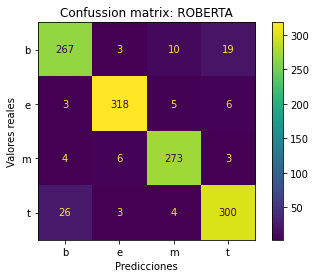

In [ ]:
# PART 3
for pre_model in pre_models_3:
  tokenizer = pre_models_3[pre_model][0]
  transformer = pre_models_3[pre_model][1]
  train_data = train_data.apply(lambda x: preprocessing(str(x)).lower()) 
  test_data = test_data.apply(lambda x: preprocessing(str(x)).lower())
  model = build_model(transformer, max_len=max_len)
  train_data_encoded = encode(train_data.astype('str'), tokenizer, max_len=max_len)
  test_data_encoded = encode(test_data.astype('str'), tokenizer, max_len=max_len)
  train_dataset, test_dataset, n_steps = create_datasets(train_data_encoded, train_label_encoded, test_data_encoded)
  model.fit(train_dataset, steps_per_epoch=n_steps, epochs=num_epochs)
  label_prediction = model.predict(test_data_encoded)
  label_pred_encoded = np.argmax(label_prediction, axis=1)
  my_evaluation(test_label_transformed, label_pred_encoded, pre_model)
  my_confusion_matrix(test_label_transformed, label_pred_encoded, pre_model)